In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [103]:
image = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/table-rectangle-furniture-line-style-icon-free-vector.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,170)

Run Hough lines using rho accuracy of 1 pixel

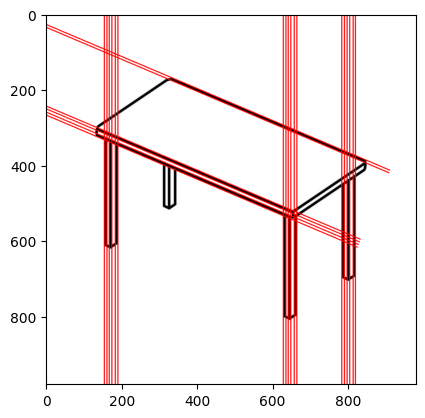

In [104]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 240)

for i in range(0,len(lines)):
  for rho, theta in lines[i]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+1000*a)
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*a)
    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

  plt.imshow(image[:,:,::-1])

Probabilistic Hough line: chỉ lấy một số lượng điểm ngẫu nhiên vừa đủ cho line detection

In [105]:
img = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/table-rectangle-furniture-line-style-icon-free-vector.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

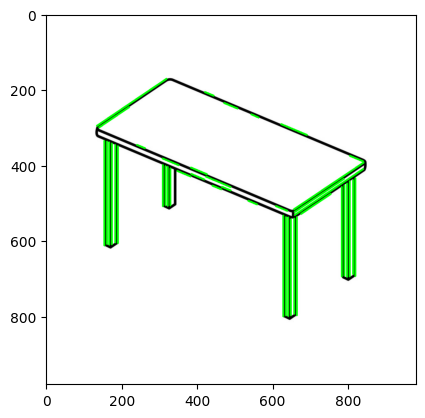

In [106]:
edges = cv2.Canny(gray_img, 50,150)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,100,20)

for i in range(0,len(lines)):
  for x1, y1, x2, y2 in lines[i]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

plt.imshow(img)

Blob detection: phương pháp phát hiện đốm màu nhằm phát hiện các vùng trong hình ảnh kỹ thuật số khác nhau về các đặc tính, chẳng hạn như độ sáng hoặc màu sắc, so với các vùng xung quanh

Gồm các bước sau

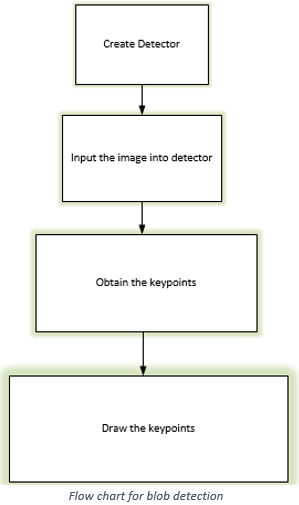

In [107]:
img = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/Screenshot 2023-09-18 092558.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Set up detector with default parameters

In [108]:
detector = cv2.SimpleBlobDetector_create()

Detect blobs

In [109]:
detectpoints = detector.detect(gray_img)

Draw detected blobs as red circles

In [110]:
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(gray_img, detectpoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

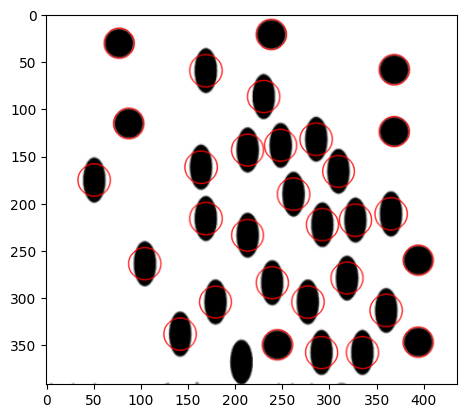

In [111]:
plt.imshow(blobs[:,:,::-1])

**Filtering te blobs - counting circles and ellipses**

Initialize the detector using default parameters

In [112]:
detector = cv2.SimpleBlobDetector_create()

Detect blobs

In [113]:
keypoints = detector.detect(img)

Draw blobs on our image as red circles

In [114]:
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(img, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [115]:
number_of_blobs = len(keypoints)
print('total no of blobs: ', number_of_blobs)

total no of blobs:  31


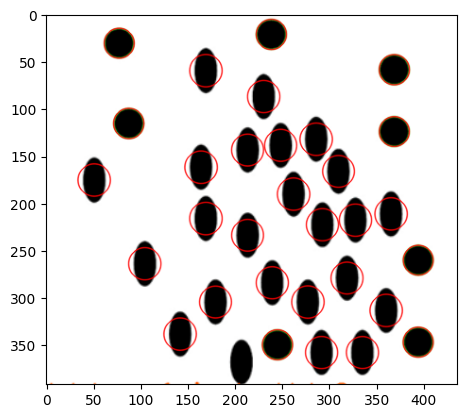

In [117]:
plt.imshow(blobs[:,:,::-1])

Set our filtering parameters

In [118]:
params = cv2.SimpleBlobDetector_Params()

Set area filtering parameters

In [119]:
params.filterByArea=True
params.minArea=100

Set circularity filtering parameters

In [120]:
params.filterByCircularity=True
params.minCircularity=0.9

Set convexity filtering parameter

In [121]:
params.filterByConvexity=False
params.minConvexity=0.2

Set inertia filtering parameter

In [122]:
params.filterByInertia=True
params.minInertiaRatio=0.01

Create detector with parameter

In [123]:
detector = cv2.SimpleBlobDetector_create(params)

Detect blobs

In [132]:
keypoints=detector.detect(img)

In [133]:
blank=np.zeros((1,1))
blobs=cv2.drawKeypoints(img,keypoints,blank,(0,255,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
number_of_blobs=len(keypoints)

In [134]:
print('total no of blobs: ', number_of_blobs)

total no of blobs:  8


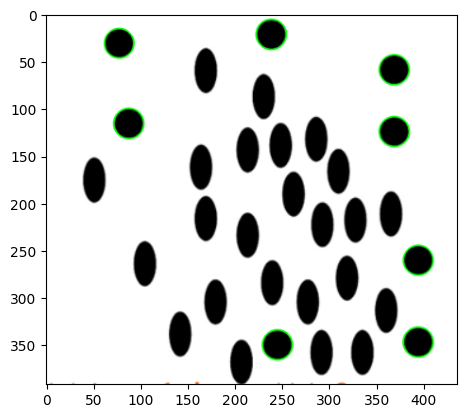

In [135]:
plt.imshow(blobs[:,:,::-1])